For Single Linkage

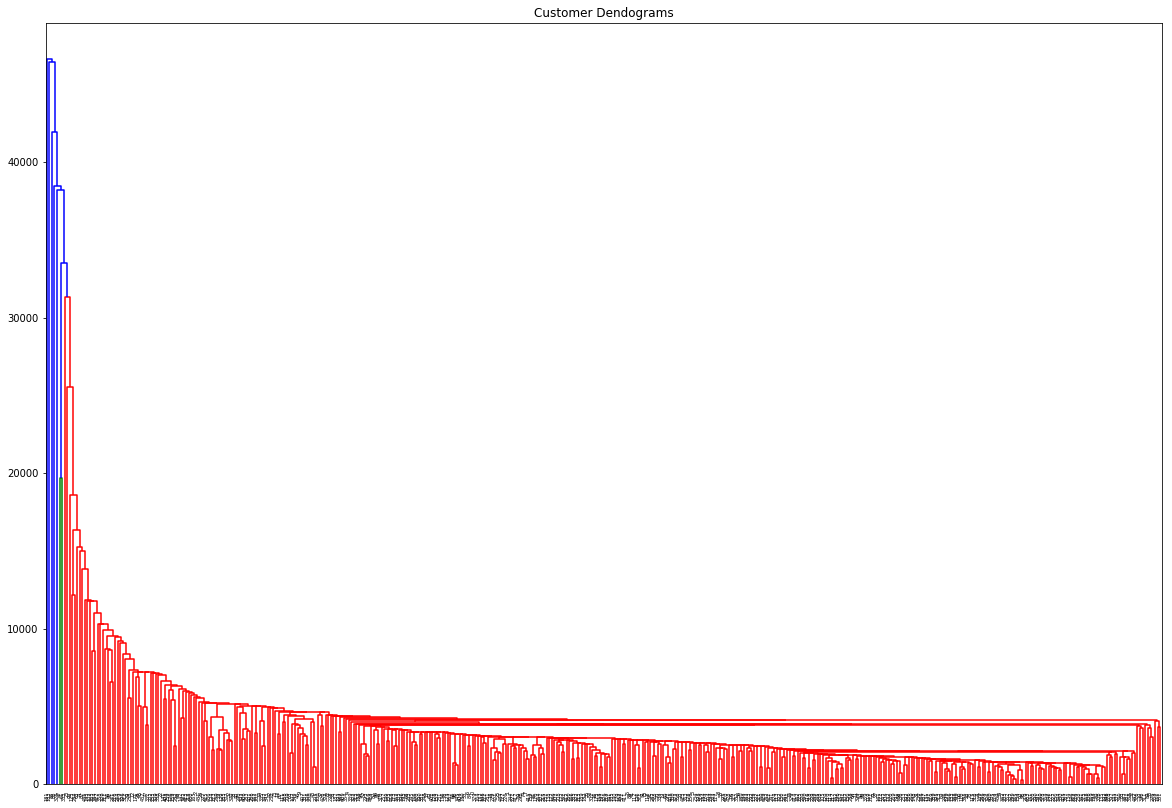

In [53]:
#Dendogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 14))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='single'))  

From dendogram we observed suitable number of clusters is 7 in single linkage.

In [78]:

import seaborn as sns
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  


file = pd.read_csv("Wholesale customers data.csv")
file = file.drop(['Channel','Region'],axis=1)
X = np.array(file)
X

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [81]:
#AgglometrativeClustering

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='single')
clust=cluster.fit_predict(X) 
r = clust.tolist()


In [82]:
#Observe Cluster
print('1 - ',r.count(0),',2 - ',r.count(1),',3 - ',r.count(2),',4 - ',r.count(3),',5 - ',r.count(4),',6 - ',r.count(5),',7 - ',r.count(6))
Number=[r.count(0),r.count(1),r.count(2),r.count(3),r.count(4),r.count(5),r.count(6)]

1 -  433 ,2 -  1 ,3 -  2 ,4 -  1 ,5 -  1 ,6 -  1 ,7 -  1


In [85]:
#Observe Center

            
cent = pd.read_csv("Wholesale customers data.csv")
cent = cent.drop(['Channel','Region'],axis=1)
centers=[]
for i in range(0,7):
    
    temp=[]
    for l in range(0,6):
        data = cent.iloc[:,l].values
        su=[]
        for j in range(len(X)):
            if r[j]==i:
                su.append(data[j])
        
        temp.append(sum(su)/Number[i])
    centers.append(temp)


In [86]:
#Centers of Each Cluster
for i in range(0,7):
    print("Center of Cluster",i+1," - ",centers[i])

Center of Cluster 1  -  [11498.766743648961, 5190.930715935335, 7405.4387990762125, 2827.8360277136258, 2655.0323325635104, 1377.6258660508083]
Center of Cluster 2  -  [112151.0, 29627.0, 18148.0, 16745.0, 4948.0, 8550.0]
Center of Cluster 3  -  [40204.0, 46314.0, 57584.5, 5518.0, 25436.0, 4241.0]
Center of Cluster 4  -  [16117.0, 46197.0, 92780.0, 1026.0, 40827.0, 2944.0]
Center of Cluster 5  -  [22925.0, 73498.0, 32114.0, 987.0, 20070.0, 903.0]
Center of Cluster 6  -  [36847.0, 43950.0, 20170.0, 36534.0, 239.0, 47943.0]
Center of Cluster 7  -  [32717.0, 16784.0, 13626.0, 60869.0, 1272.0, 5609.0]


In [92]:
#cross verification of centers for cluster 0
import random
from sklearn.cluster import KMeans
kle = pd.read_csv("Wholesale customers data.csv")
kle =kle.drop(['Channel','Region'],axis=1)
kle['clu']=r
kle = kle.sort_values(['clu'], ascending=[1])
kle = kle.head(433)
kmeans = KMeans(n_clusters=1,random_state=random.randint(0,90))
kmea = kmeans.fit(kle)
kmea.cluster_centers_

array([[11498.76674365,  5190.93071594,  7405.43879908,  2827.83602771,
         2655.03233256,  1377.62586605,     0.        ]])

In [93]:
#For calculating SSE
sse=[]
for j in range(5):
    su=0
    for i in range(len(file)):
        if clust[i]==j:
            su=su+pow(np.linalg.norm((file.values[i]-centers[j])),2)
    sse.append(su)
print('SSE within Clusture :', sse)
print("Total SSE : ",sum(sse))

SSE within Clusture : [109836301652.28638, 0.0, 194027896.5, 0.0, 0.0]
Total SSE :  110030329548.78638


In [96]:
#Heterogeneity
centers=np.array(centers)
for i in range(7):
    for j in range(i,6):
        su=su+pow(np.linalg.norm((centers[i]-centers[j+1])),2)
print("Between SSE : ",su)

Between SSE :  152834816155.2212


For Complete Linkage

In [97]:
#AgglometrativeClustering

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust=cluster.fit_predict(X) 
r = clust.tolist()


In [98]:
#Observe Cluster
print('1 - ',r.count(0),',2 - ',r.count(1),',3 - ',r.count(2),',4 - ',r.count(3),',5 - ',r.count(4))
Number=[r.count(0),r.count(1),r.count(2),r.count(3),r.count(4)]

1 -  428 ,2 -  3 ,3 -  2 ,4 -  3 ,5 -  4


In [100]:
#Observe Center

            
cent = pd.read_csv("Wholesale customers data.csv")
cent = cent.drop(['Channel','Region'],axis=1)
centers=[]
for i in range(0,5):
    
    temp=[]
    for l in range(0,6):
        data = cent.iloc[:,l].values
        su=[]
        for j in range(len(X)):
            if r[j]==i:
                su.append(data[j])
        
        temp.append(sum(su)/Number[i])
    centers.append(temp)
    
print(centers)

              
            


    


[[11185.808411214954, 5129.196261682243, 7232.394859813084, 2707.7780373831774, 2583.154205607477, 1338.2056074766356], [26959.333333333332, 21274.666666666668, 11952.666666666666, 44137.333333333336, 527.3333333333334, 18750.0], [12341.0, 25588.5, 80039.0, 578.5, 39464.5, 2079.5], [85779.66666666667, 12503.666666666666, 12619.666666666666, 13991.666666666666, 2159.0, 3958.0], [32426.5, 50637.25, 42325.5, 4294.25, 18819.75, 6477.0]]


In [101]:
#Centers of Each Cluster
for i in range(0,5):
    print("Center of Cluster",i+1," - ",centers[i])

Center of Cluster 1  -  [11185.808411214954, 5129.196261682243, 7232.394859813084, 2707.7780373831774, 2583.154205607477, 1338.2056074766356]
Center of Cluster 2  -  [26959.333333333332, 21274.666666666668, 11952.666666666666, 44137.333333333336, 527.3333333333334, 18750.0]
Center of Cluster 3  -  [12341.0, 25588.5, 80039.0, 578.5, 39464.5, 2079.5]
Center of Cluster 4  -  [85779.66666666667, 12503.666666666666, 12619.666666666666, 13991.666666666666, 2159.0, 3958.0]
Center of Cluster 5  -  [32426.5, 50637.25, 42325.5, 4294.25, 18819.75, 6477.0]


In [102]:
#For calculating SSE
sse=[]
for j in range(5):
    su=0
    for i in range(len(file)):
        if clust[i]==j:
            su=su+pow(np.linalg.norm((file.values[i]-centers[j])),2)
    sse.append(su)
print('SSE within Clusture :', sse)
print("Total SSE : ",sum(sse))

SSE within Clusture : [94433119111.71501, 3113377517.333333, 1208211104.0, 1657529736.666667, 2641798770.25]
Total SSE :  103054036239.96501


In [103]:
#Heterogeneity
centers=np.array(centers)
for i in range(5):
    for j in range(i,4):
        su=su+pow(np.linalg.norm((centers[i]-centers[j+1])),2)
print("Between SSE : ",su)

Between SSE :  59384403478.99527


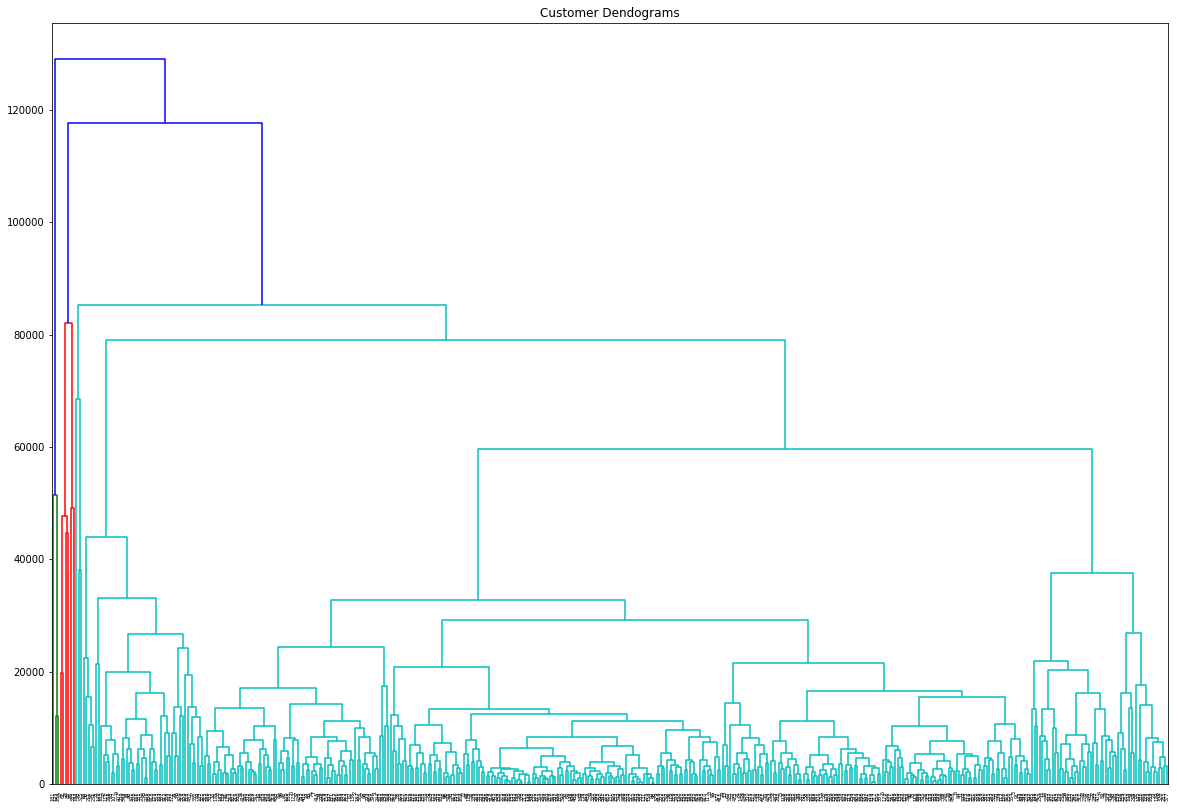

In [58]:
#Dendogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 14))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='complete'))  

From dendogram we observed suitable number of clusters is 3 in Complete linkage.

For Average Linkage

In [105]:
#AgglometrativeClustering

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
clust=cluster.fit_predict(X) 
r = clust.tolist()



In [106]:
#Observe Cluster
print('1 - ',r.count(0),',2 - ',r.count(1),',3 - ',r.count(2),',4 - ',r.count(3),',5 - ',r.count(4))
Number=[r.count(0),r.count(1),r.count(2),r.count(3),r.count(4)]

1 -  2 ,2 -  432 ,3 -  2 ,4 -  1 ,5 -  3


In [131]:
#Observe Center

            
cent = pd.read_csv("Wholesale customers data.csv")
cent = cent.drop(['Channel','Region'],axis=1)
centers=[]
for i in range(0,5):
    
    temp=[]
    for l in range(0,6):
        data = cent.iloc[:,l].values
        su=[]
        for j in range(len(X)):
            if r[j]==i:
                su.append(data[j])
        
        temp.append(sum(su)/Number[i])
    centers.append(temp)
    
print(centers)

[[34782.0, 30367.0, 16898.0, 48701.5, 755.5, 26776.0], [11505.55787037037, 5191.418981481482, 7266.798611111111, 2834.078703703704, 2572.9791666666665, 1378.0023148148148], [12341.0, 25588.5, 80039.0, 578.5, 39464.5, 2079.5], [112151.0, 29627.0, 18148.0, 16745.0, 4948.0, 8550.0], [34444.333333333336, 55375.333333333336, 49094.333333333336, 4007.6666666666665, 23647.333333333332, 3128.3333333333335]]


In [139]:
#Centers of Each Cluster
for i in range(0,5):
    print("Center of Cluster",i+1," - ",centers[i])

Center of Cluster 1  -  [34782.0, 30367.0, 16898.0, 48701.5, 755.5, 26776.0]
Center of Cluster 2  -  [11505.55787037037, 5191.418981481482, 7266.798611111111, 2834.078703703704, 2572.9791666666665, 1378.0023148148148]
Center of Cluster 3  -  [12341.0, 25588.5, 80039.0, 578.5, 39464.5, 2079.5]
Center of Cluster 4  -  [112151.0, 29627.0, 18148.0, 16745.0, 4948.0, 8550.0]
Center of Cluster 5  -  [34444.333333333336, 55375.333333333336, 49094.333333333336, 4007.6666666666665, 23647.333333333332, 3128.3333333333335]


In [147]:
#For calculating SSE
sse=[]
for j in range(5):
    su=0
    for i in range(len(file)):
        if clust[i]==j:
            su=su+pow(np.linalg.norm((file.values[i]-centers[j])),2)
    sse.append(su)
print('SSE within Clusture :', sse)
print("Total SSE : ",sum(sse))
for i in range(5):
    for j in range(i,5):
        pow(np.linalg.norm((file.values[i]-centers[j])),2)
        

SSE within Clusture : [1591649630.9999998, 104965495422.33104, 1208211104.0, 0.0, 1358525382.0]
Total SSE :  109123881539.33104


In [148]:
#Heterogeneity
centers=np.array(centers)
for i in range(5):
    for j in range(i,4):
        su=su+pow(np.linalg.norm((centers[i]-centers[j+1])),2)
print("Between SSE : ",su)

Between SSE :  75935965170.99385


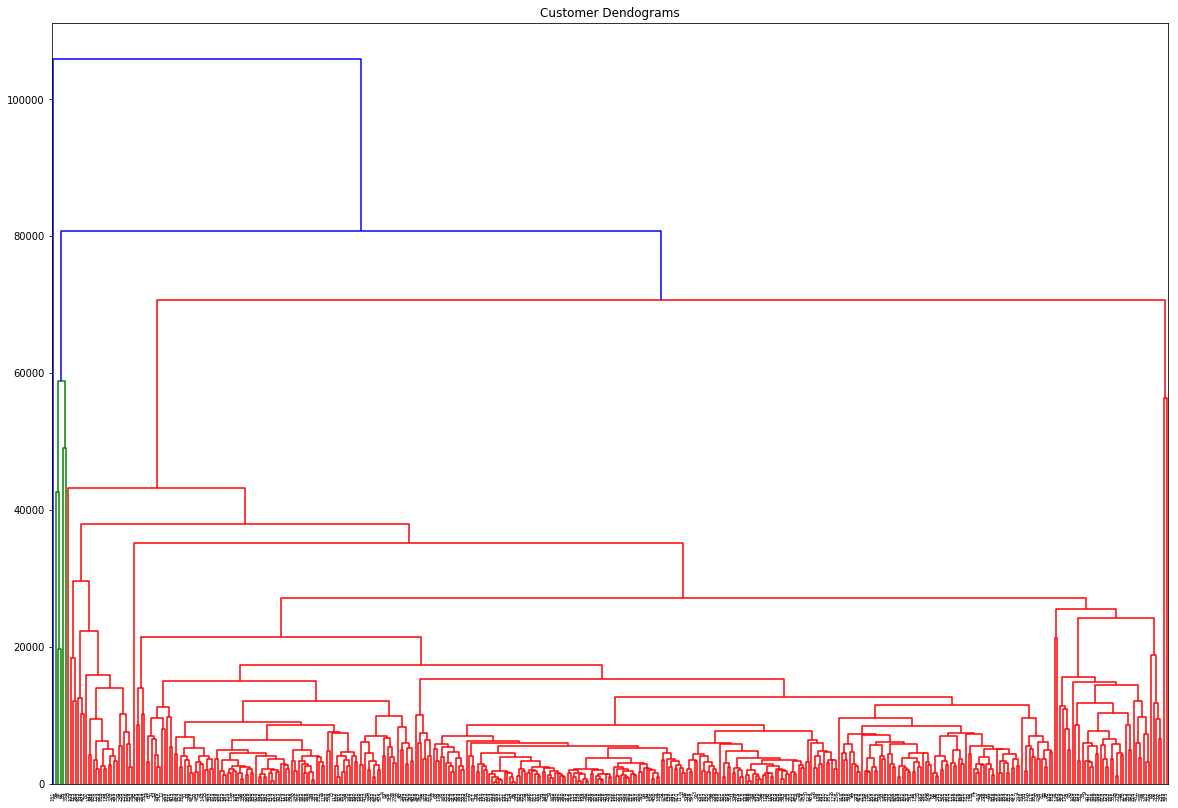

In [69]:
#Dendogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 14))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='average'))  

From dendogram we observed suitable number of clusters is 2 in Complete linkage.
